# Introduction

The dataset in focus pertains to the **default of credit card clients**, sourced from a large-scale credit card default prediction task. The data consists of several explanatory variables that describe the financial and personal status of the clients, alongside a binary target variable indicating whether the client defaulted on their credit card payment. 

The primary objective of this study is to explore and preprocess the dataset to identify key factors influencing credit card default. A total of **24 variables** are included in the dataset, with the main focus on understanding the relationships between these explanatory variables and the likelihood of default. 

In the process of data inspection and preprocessing, the dataset will be cleaned, formatted, and prepared for further modeling. The variables include personal information such as gender, age, marital status, and education, along with financial data such as payment history, bill statement amounts, and payment amounts. 

By transforming the raw data into a well-structured format, this work aims to facilitate the application of machine learning models to predict credit card defaults and derive actionable insights for financial institutions.


# Data Preprocessing and Inspection

In [1]:
from scipy.io import arff
import pandas as pd

# Load the ARFF file to inspect the data structure and identify relevant features for modeling.
file_path = r"C:\Users\Owner\Desktop\Final\Triveni\default of credit card clients.arff"
data, meta = arff.loadarff(file_path)

# Convert the data to a DataFrame for easier manipulation and analysis.
df = pd.DataFrame(data)

# Display the first few rows to understand its structure
df.head()


D:\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x15,x16,x17,x18,x19,x20,x21,x22,x23,y
0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,b'1'
1,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,b'1'
2,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,b'0'
3,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,b'0'
4,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,b'0'


In [2]:
# Decode any byte-encoded columns, particularly the target variable
# Update 'y' or any other target column if needed
if df['y'].dtype == 'object':
    df['y'] = df['y'].apply(lambda x: int(x.decode('utf-8')))

# Display the first few rows to inspect
df.head()


,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x15,x16,x17,x18,x19,x20,x21,x22,x23,y
0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Dataset Description and Variable Definitions

This research utilized a binary variable, **default payment** (Yes = 1, No = 0), as the response variable. The following 23 explanatory variables were included:

- **X1**: Amount of given credit (NT dollar) — this includes both individual consumer credit and supplementary family credit.
- **X2**: Gender (1 = male; 2 = female)
- **X3**: Education level (1 = graduate school; 2 = university; 3 = high school; 4 = others)
- **X4**: Marital status (1 = married; 2 = single; 3 = others)
- **X5**: Age (years)
  
#### Payment History Variables (X6 - X11)
These variables reflect the history of past monthly payments, recorded from April to September 2005:
- **X6**: Repayment status in September 2005
- **X7**: Repayment status in August 2005
- **X8**: Repayment status in July 2005
- **X9**: Repayment status in June 2005
- **X10**: Repayment status in May 2005
- **X11**: Repayment status in April 2005

The measurement scale for repayment status is:
- -1 = payment made on time
- 1 = payment delayed by one month
- 2 = payment delayed by two months
- ...
- 8 = payment delayed by eight months
- 9 = payment delayed by nine months or more

#### Bill Statement Variables (X12 - X17)
These variables indicate the amount on each monthly bill statement from April to September 2005:
- **X12**: Bill statement amount in September 2005
- **X13**: Bill statement amount in August 2005
- **X14**: Bill statement amount in July 2005
- **X15**: Bill statement amount in June 2005
- **X16**: Bill statement amount in May 2005
- **X17**: Bill statement amount in April 2005

#### Payment Amount Variables (X18 - X23)
These variables reflect the actual amounts paid in each month from April to September 2005:
- **X18**: Amount paid in September 2005
- **X19**: Amount paid in August 2005
- **X20**: Amount paid in July 2005
- **X21**: Amount paid in June 2005
- **X22**: Amount paid in May 2005
- **X23**: Amount paid in April 2005

To improve data clarity, the following column names have been modified:

- The target variable has been renamed to **default** for brevity and better comprehension.


## Rename Columns for Better Clarity
Some column names might not be very descriptive. We'll rename them to make them easier to understand.


In [3]:
# Define the mapping for the columns to reflect the provided descriptions
rename_columns = {
    'x1': 'credit_amount',                 # Credit amount given (NT dollar)
    'x2': 'gender',                        # Gender (1 = male; 2 = female)
    'x3': 'education',                     # Education level (1 = graduate school; 2 = university; 3 = high school; 4 = others)
    'x4': 'marital_status',                # Marital status (1 = married; 2 = single; 3 = others)
    'x5': 'age',                           # Age in years
    # Payment history variables (X6 - X11)
    'x6': 'repayment_status_sept',         # Repayment status in September 2005
    'x7': 'repayment_status_aug',          # Repayment status in August 2005
    'x8': 'repayment_status_jul',          # Repayment status in July 2005
    'x9': 'repayment_status_jun',          # Repayment status in June 2005
    'x10': 'repayment_status_may',         # Repayment status in May 2005
    'x11': 'repayment_status_apr',         # Repayment status in April 2005
    # Bill statement amounts (X12 - X17)
    'x12': 'bill_statement_sept',          # Bill statement amount in September 2005
    'x13': 'bill_statement_aug',           # Bill statement amount in August 2005
    'x14': 'bill_statement_jul',           # Bill statement amount in July 2005
    'x15': 'bill_statement_jun',           # Bill statement amount in June 2005
    'x16': 'bill_statement_may',           # Bill statement amount in May 2005
    'x17': 'bill_statement_apr',           # Bill statement amount in April 2005
    # Payment amounts (X18 - X23)
    'x18': 'amount_paid_sept',             # Amount paid in September 2005
    'x19': 'amount_paid_aug',              # Amount paid in August 2005
    'x20': 'amount_paid_jul',              # Amount paid in July 2005
    'x21': 'amount_paid_jun',              # Amount paid in June 2005
    'x22': 'amount_paid_may',              # Amount paid in May 2005
    'x23': 'amount_paid_apr',              # Amount paid in April 2005
    'y': 'default'                         # Default payment (Yes=1, No=0)
}

# Apply the column renaming to the DataFrame
df.rename(columns=rename_columns, inplace=True)

# Display the updated column names to confirm renaming
print("Updated Columns:\n", df.columns)


Updated Columns:
 Index(['id', 'credit_amount', 'gender', 'education', 'marital_status', 'age',
       'repayment_status_sept', 'repayment_status_aug', 'repayment_status_jul',
       'repayment_status_jun', 'repayment_status_may', 'repayment_status_apr',
       'bill_statement_sept', 'bill_statement_aug', 'bill_statement_jul',
       'bill_statement_jun', 'bill_statement_may', 'bill_statement_apr',
       'amount_paid_sept', 'amount_paid_aug', 'amount_paid_jul',
       'amount_paid_jun', 'amount_paid_may', 'amount_paid_apr', 'default'],
      dtype='object')


# Saving and Reloading the Dataset as CSV

In [4]:
csv_output_path = r"C:\Users\Owner\Desktop\Final\Triveni\default_of_credit_card_clients.csv"
# Save the DataFrame to a CSV file
df.to_csv(csv_output_path, index=False)


# Loading the Dataset

In [5]:
import pandas as pd
df= pd.read_csv( r"C:\Users\Owner\Desktop\Final\Triveni\default_of_credit_card_clients.csv")

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Check basic info and display the first few rows
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     30000 non-null  float64
 1   credit_amount          30000 non-null  float64
 2   gender                 30000 non-null  float64
 3   education              30000 non-null  float64
 4   marital_status         30000 non-null  float64
 5   age                    30000 non-null  float64
 6   repayment_status_sept  30000 non-null  float64
 7   repayment_status_aug   30000 non-null  float64
 8   repayment_status_jul   30000 non-null  float64
 9   repayment_status_jun   30000 non-null  float64
 10  repayment_status_may   30000 non-null  float64
 11  repayment_status_apr   30000 non-null  float64
 12  bill_statement_sept    30000 non-null  float64
 13  bill_statement_aug     30000 non-null  float64
 14  bill_statement_jul     30000 non-null  float64
 15  bi

,id,credit_amount,gender,education,marital_status,age,repayment_status_sept,repayment_status_aug,repayment_status_jul,repayment_status_jun,...,bill_statement_jun,bill_statement_may,bill_statement_apr,amount_paid_sept,amount_paid_aug,amount_paid_jul,amount_paid_jun,amount_paid_may,amount_paid_apr,default
0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


By quickly glancing through the data, some issues become immediately apparent. Notably, the dataset's description does not specify the meaning of `0` values across various columns, which complicates interpretation. Additionally, certain columns under `repayment_status` contain negative values, further obscuring the data’s clarity and making it challenging to derive meaningful insights without additional context. These issues highlight the need for thorough data exploration and cleaning to ensure accurate analysis.


# Checking for Missing Values and Data Types

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values 



id                       0
credit_amount            0
gender                   0
education                0
marital_status           0
age                      0
repayment_status_sept    0
repayment_status_aug     0
repayment_status_jul     0
repayment_status_jun     0
repayment_status_may     0
repayment_status_apr     0
bill_statement_sept      0
bill_statement_aug       0
bill_statement_jul       0
bill_statement_jun       0
bill_statement_may       0
bill_statement_apr       0
amount_paid_sept         0
amount_paid_aug          0
amount_paid_jul          0
amount_paid_jun          0
amount_paid_may          0
amount_paid_apr          0
default                  0
dtype: int64

In [9]:
# Summary of data types
df.dtypes


id                       float64
credit_amount            float64
gender                   float64
education                float64
marital_status           float64
age                      float64
repayment_status_sept    float64
repayment_status_aug     float64
repayment_status_jul     float64
repayment_status_jun     float64
repayment_status_may     float64
repayment_status_apr     float64
bill_statement_sept      float64
bill_statement_aug       float64
bill_statement_jul       float64
bill_statement_jun       float64
bill_statement_may       float64
bill_statement_apr       float64
amount_paid_sept         float64
amount_paid_aug          float64
amount_paid_jul          float64
amount_paid_jun          float64
amount_paid_may          float64
amount_paid_apr          float64
default                    int64
dtype: object

In [10]:
# Identify outliers using basic statistical methods
df.describe()

,id,credit_amount,gender,education,marital_status,age,repayment_status_sept,repayment_status_aug,repayment_status_jul,repayment_status_jun,...,bill_statement_jun,bill_statement_may,bill_statement_apr,amount_paid_sept,amount_paid_aug,amount_paid_jul,amount_paid_jun,amount_paid_may,amount_paid_apr,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [11]:
# Unique values in categorical columns
categorical_cols = ['gender', 'education', 'marital_status','repayment_status_sept','repayment_status_aug','repayment_status_jul','repayment_status_jun','repayment_status_may','repayment_status_apr']
for col in categorical_cols:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in gender: [2. 1.]
Unique values in education: [2. 1. 3. 5. 4. 6. 0.]
Unique values in marital_status: [1. 2. 3. 0.]
Unique values in repayment_status_sept: [ 2. -1.  0. -2.  1.  3.  4.  8.  7.  5.  6.]
Unique values in repayment_status_aug: [ 2.  0. -1. -2.  3.  5.  7.  4.  1.  6.  8.]
Unique values in repayment_status_jul: [-1.  0.  2. -2.  3.  4.  6.  7.  1.  5.  8.]
Unique values in repayment_status_jun: [-1.  0. -2.  2.  3.  4.  5.  7.  6.  1.  8.]
Unique values in repayment_status_may: [-2.  0. -1.  2.  3.  5.  4.  7.  8.  6.]
Unique values in repayment_status_apr: [-2.  2.  0. -1.  3.  6.  4.  7.  8.  5.]


# Data Cleaning

In [12]:
# Data Cleaning: For Education
education_filter = (df['education'] == 5) | (df['education'] == 6) | (df['education'] == 0)
df.loc[education_filter, 'education'] = 4

In [13]:
# Data Cleaning: For Marriage
df.loc[df['marital_status'] == 0, 'marital_status'] = 3

In [14]:
# Data Cleaning: For 'Repayment_status_apr to Repayment_status_sept'
pay_cols = ['repayment_status_sept', 'repayment_status_aug', 'repayment_status_jul', 
            'repayment_status_jun', 'repayment_status_may', 'repayment_status_apr']
for col in pay_cols:
    df.loc[(df[col] == -2) | (df[col] == -1) | (df[col] == 0), col] = 0

In [15]:
df.head()


,id,credit_amount,gender,education,marital_status,age,repayment_status_sept,repayment_status_aug,repayment_status_jul,repayment_status_jun,...,bill_statement_jun,bill_statement_may,bill_statement_apr,amount_paid_sept,amount_paid_aug,amount_paid_jul,amount_paid_jun,amount_paid_may,amount_paid_apr,default
0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2.0,120000.0,2.0,2.0,2.0,26.0,0.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5.0,50000.0,1.0,2.0,1.0,57.0,0.0,0.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Exploratory Data Analysis (EDA)

### Target Variable Distribution

In [16]:
# Display counts and percentages
target_counts = df['default'].value_counts()
target_percent = df['default'].value_counts(normalize=True) * 100
print("Target Distribution:\n", target_counts)
print("Target Percentage Distribution:\n", target_percent)

Target Distribution:
 default
0    23364
1     6636
Name: count, dtype: int64
Target Percentage Distribution:
 default
0    77.88
1    22.12
Name: proportion, dtype: float64


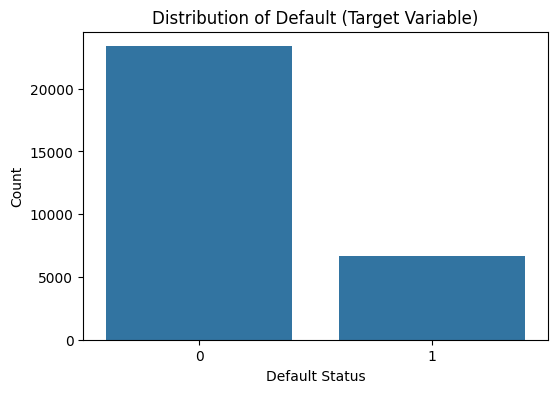

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='default', data=df)
plt.title("Distribution of Default (Target Variable)")
plt.xlabel("Default Status")
plt.ylabel("Count")
plt.show()



### Observations 

- The majority of clients (approximately 77%) did not default on their payments (label `0`), while around 23% of clients defaulted (label `1`).  
- The dataset is imbalanced, with significantly more non-defaulting clients, which may require techniques such as resampling or weighting during modeling to avoid biased predictions.


## Univariate Analysis

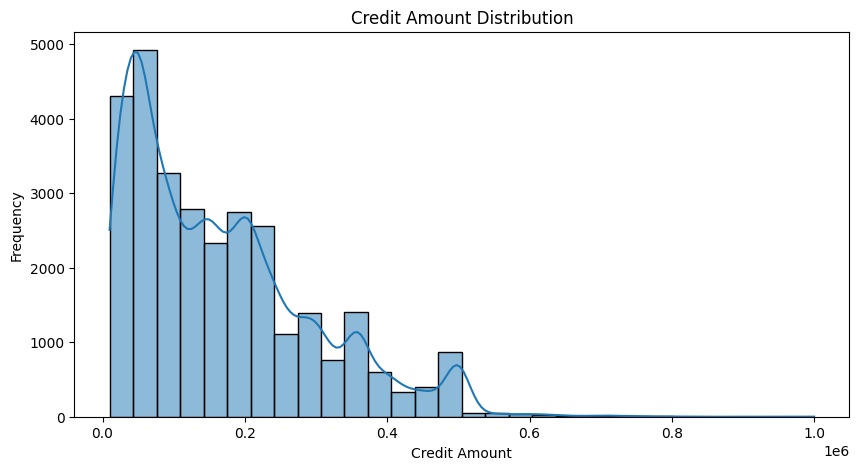

In [18]:
# Credit Amount Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['credit_amount'], kde=True, bins=30)
plt.title('Credit Amount Distribution')
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.show()

#### Observation: Credit Amount Distribution
The distribution is right-skewed, with most customers having low credit limits.
A few customers have significantly higher credit limits, creating a long tail.
The majority fall within a specific lower range of credit amounts.

### Age Distribution

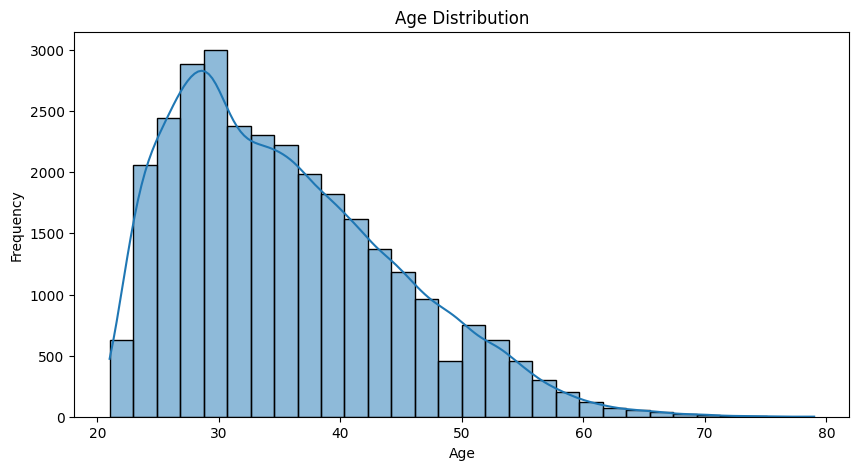

In [19]:
# Age Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Observations 

- The age distribution is right-skewed, with most clients concentrated between 25 and 40 years old.  
- Fewer clients are observed in older age groups (above 50), with the frequency declining steadily as age increases.  
- The peak age group is around 30, indicating that the dataset predominantly consists of younger to middle-aged individuals.


### Repayment Status Across Different Months

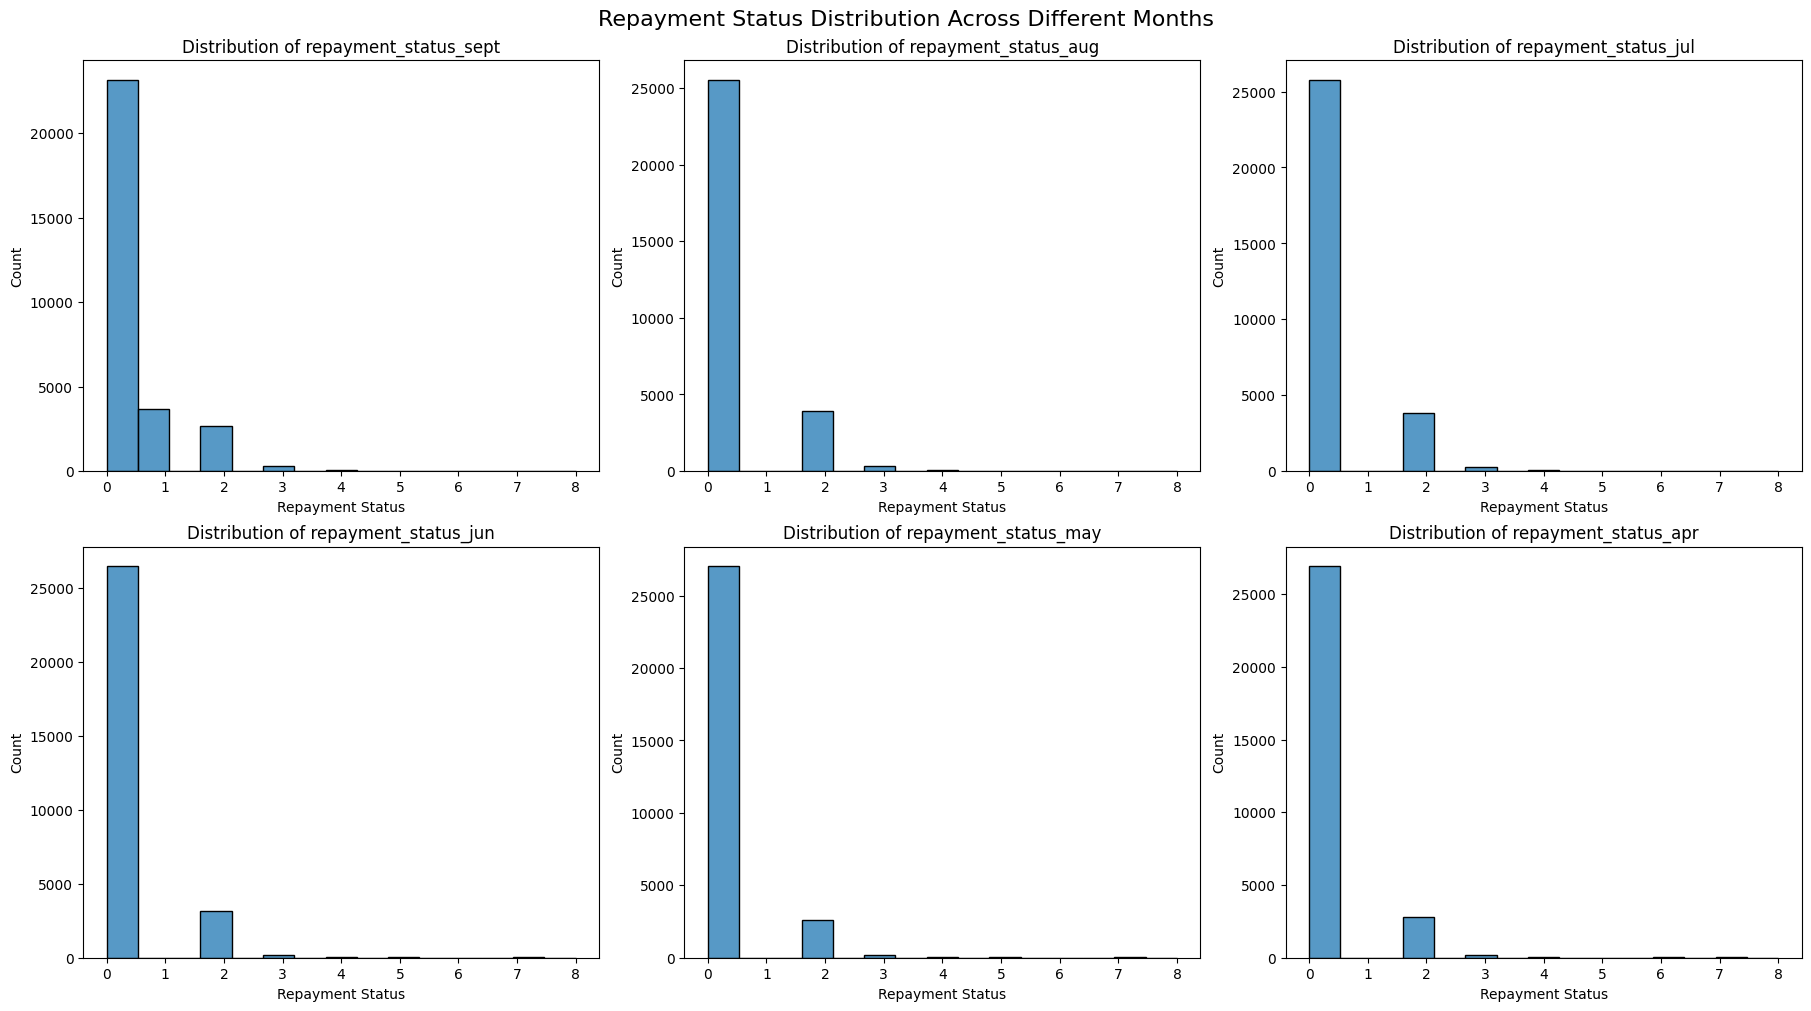

In [20]:
# Preparing repayment status columns
repayment_columns = ['repayment_status_sept', 'repayment_status_aug', 'repayment_status_jul', 
                     'repayment_status_jun', 'repayment_status_may', 'repayment_status_apr']

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), constrained_layout=True)

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot each repayment status column in a subplot
for i, col in enumerate(repayment_columns):
    sns.histplot(data=df, x=col, ax=axes[i], bins=15)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Repayment Status')
    axes[i].set_ylabel('Count')

# Overall title for the figure
plt.suptitle('Repayment Status Distribution Across Different Months', fontsize=16)
plt.show()


#### Observation Repayment Status
The majority of repayment statuses across all months are concentrated at status 0, indicating no delay in payment.
A smaller proportion of the data shows statuses 1 and 2, representing minor delays, with very few instances of higher delays.
The distribution remains consistent across all months, suggesting similar repayment behavior over time.

## Bill Statement Analysis (April to September)

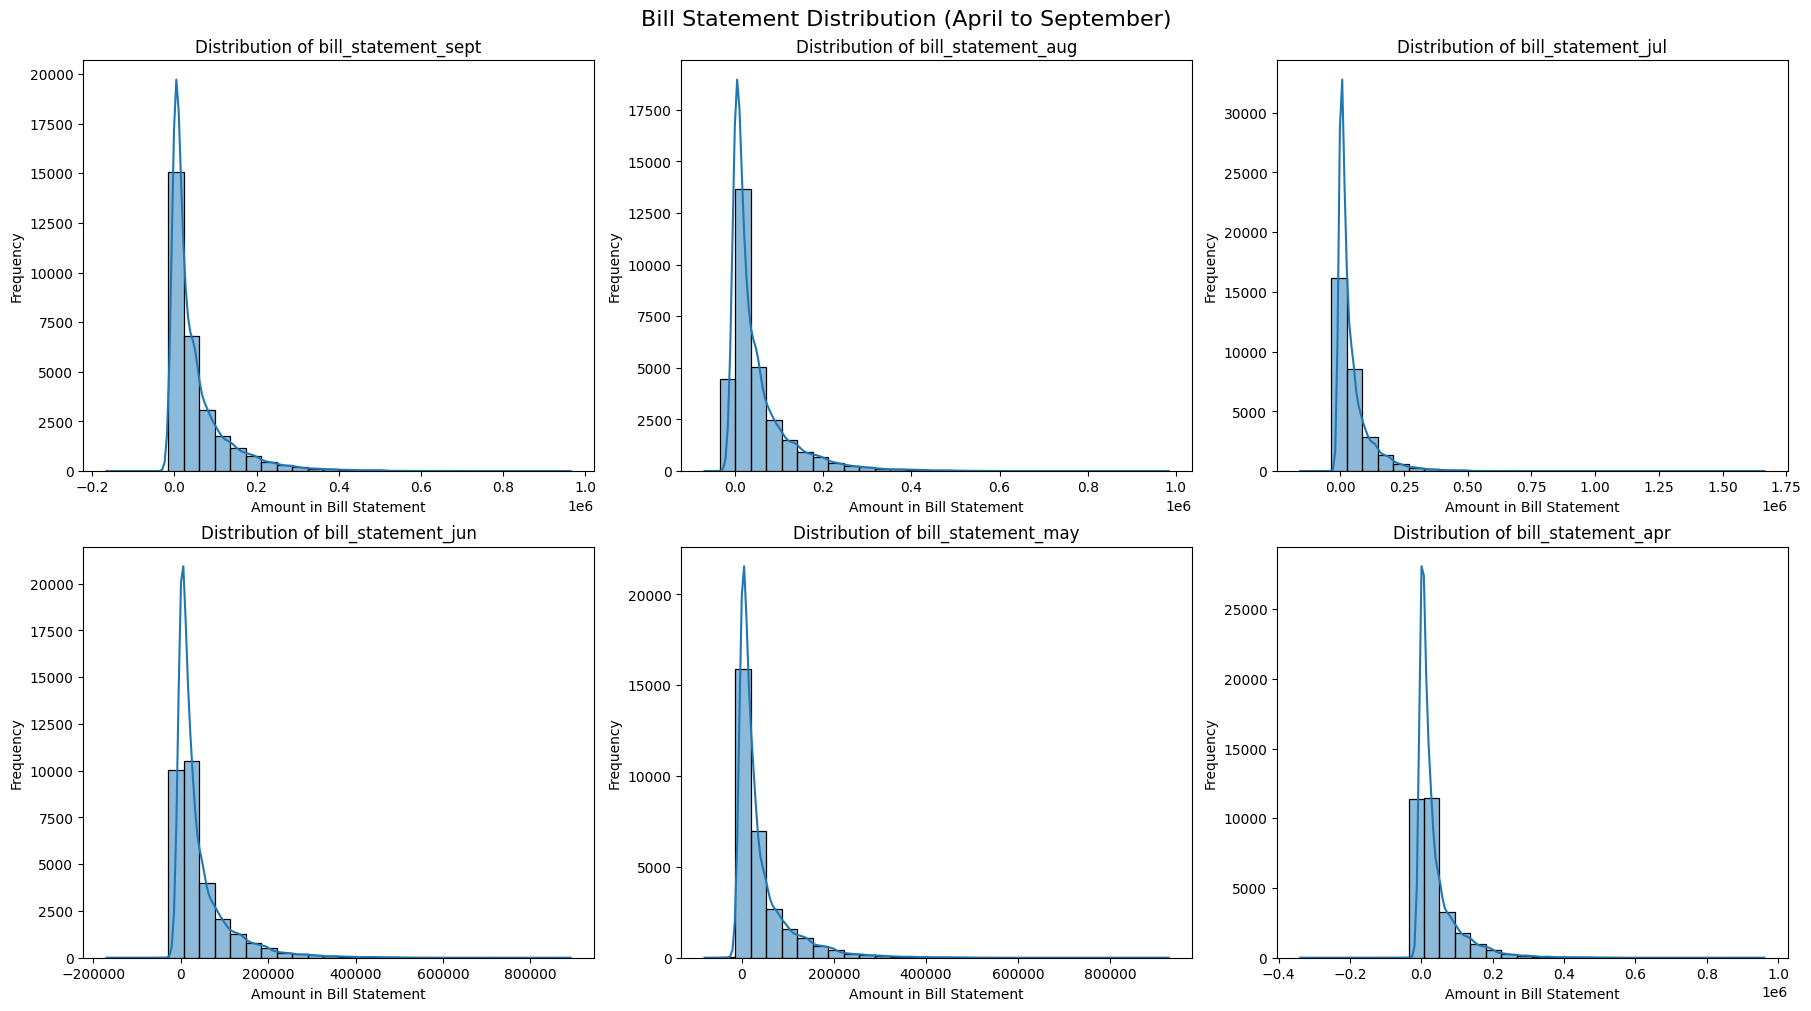

In [21]:
# Preparing the bill statement columns
bill_cols = ['bill_statement_sept', 'bill_statement_aug', 'bill_statement_jul', 
             'bill_statement_jun', 'bill_statement_may', 'bill_statement_apr']

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), constrained_layout=True)

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot each bill column in a subplot
for i, col in enumerate(bill_cols):
    sns.histplot(data=df, x=col, kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Amount in Bill Statement')
    axes[i].set_ylabel('Frequency')

# Overall title for the figure
plt.suptitle('Bill Statement Distribution (April to September)', fontsize=16)
plt.show()


#### Observation Bill Statements
The bill statement distributions are heavily right-skewed for all months, indicating that most customers have relatively low bill amounts.
A small number of customers have exceptionally high bill statements, as evidenced by the long tails in the distributions.
The distributions show similar patterns across months, indicating stability in billing trends over time.

## Amount Paid Analysis (April to September)

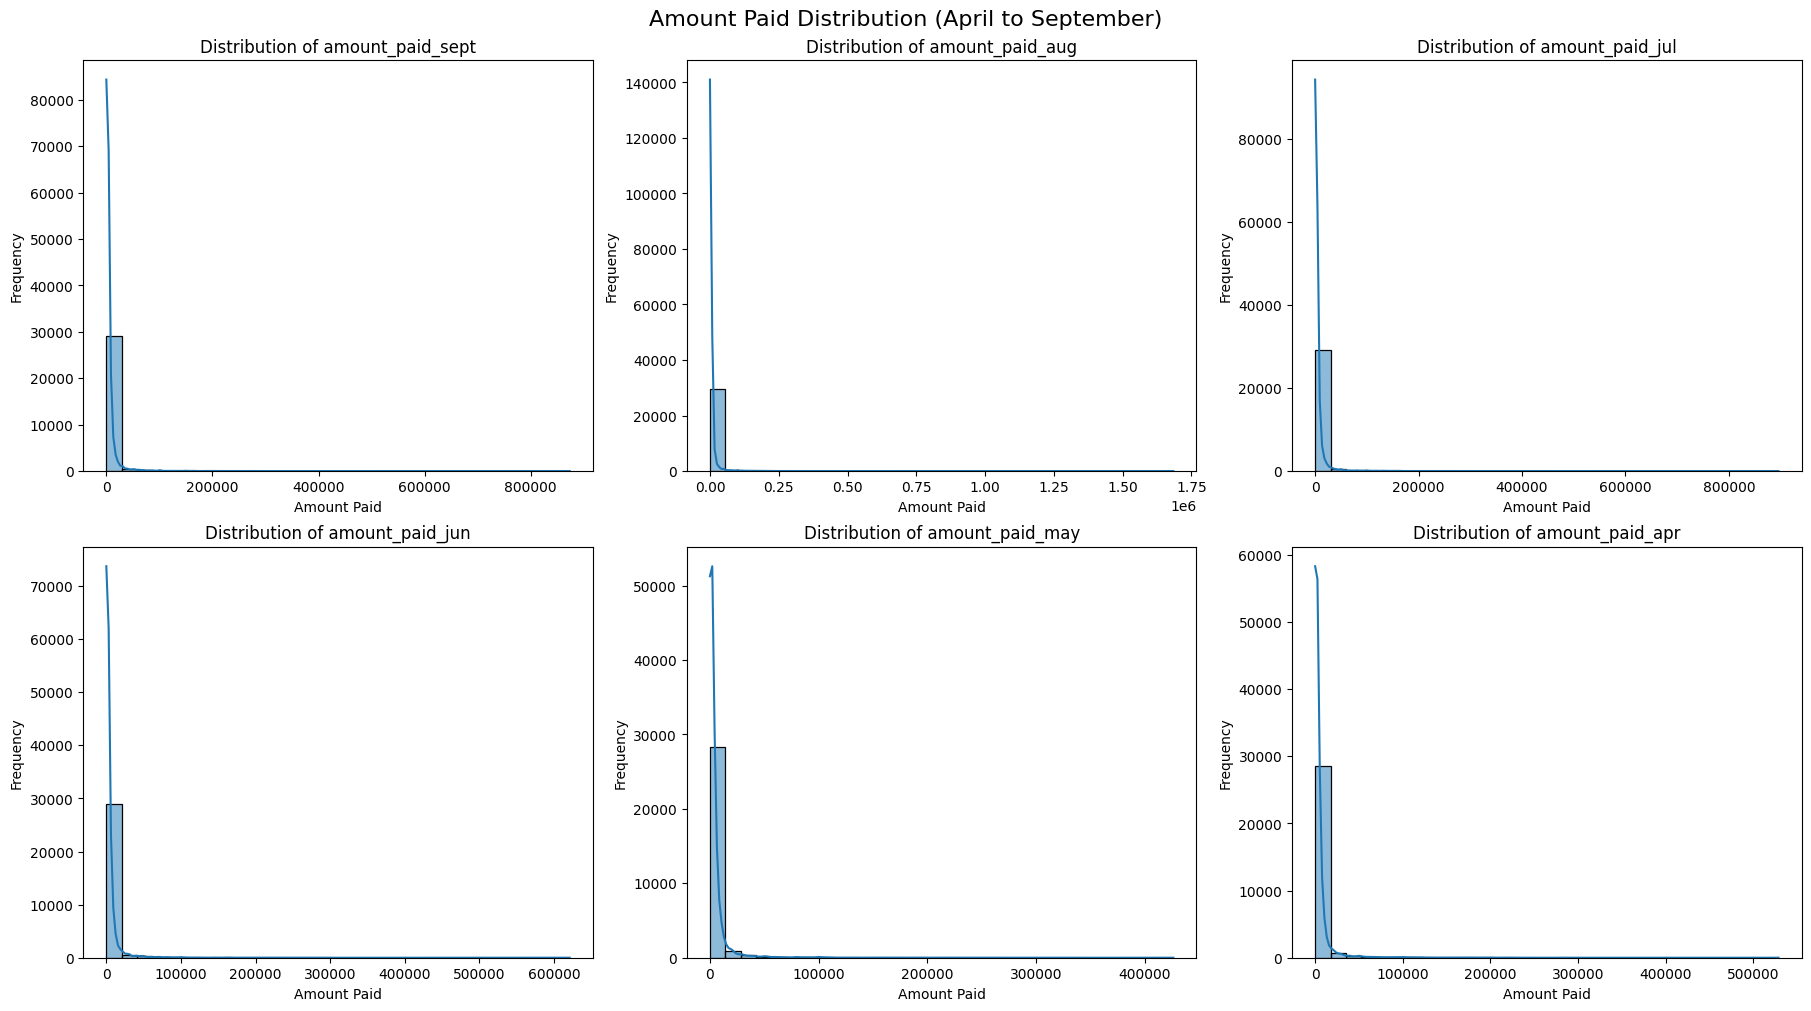

In [22]:
# Amount Paid Analysis (June to April)
paid_cols = ['amount_paid_sept', 'amount_paid_aug', 'amount_paid_jul', 'amount_paid_jun',
             'amount_paid_may', 'amount_paid_apr']

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), constrained_layout=True)

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot each amount paid column in a subplot
for i, col in enumerate(paid_cols):
    sns.histplot(data=df, x=col, kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Amount Paid')
    axes[i].set_ylabel('Frequency')

# Overall title for the figure
plt.suptitle('Amount Paid Distribution (April to September)', fontsize=16)
plt.show()

#### Observation  Amount Paid
The "amount paid" distributions are also right-skewed, showing that most customers pay relatively small amounts, while a few pay significantly larger sums.
The peaks near zero suggest that a substantial number of customers made minimal payments in certain months.
Despite the skewness, the distributions across all months are consistent, reflecting uniform payment behavior.

## Gender Distribution

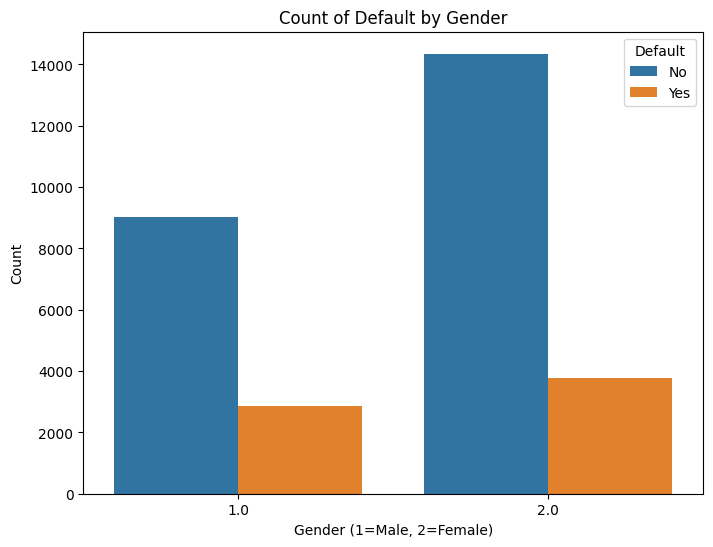

In [23]:
# Count plot for target variable by 'Gender' 
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender', hue='default')
plt.title("Count of Default by Gender")
plt.xlabel("Gender (1=Male, 2=Female)")
plt.ylabel("Count")
plt.legend(title="Default", labels=["No", "Yes"])
plt.show()

### Observations 

- **Females (2)** have a higher total count than males (1) in both default (`Yes`) and non-default (`No`) categories.  
- The proportion of defaults is slightly higher for males compared to females, indicating that males might have a marginally higher default risk.  
- Non-defaulting clients form the majority for both genders, consistent with the overall dataset distribution.


## Education Distribution

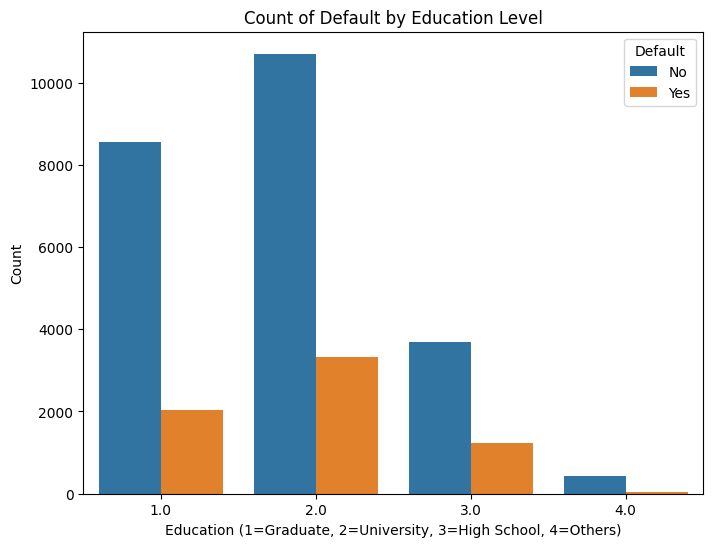

In [24]:
# Count plot for target variable by 'Education' 
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='education', hue='default')
plt.title("Count of Default by Education Level")
plt.xlabel("Education (1=Graduate, 2=University, 3=High School, 4=Others)")
plt.ylabel("Count")
plt.legend(title="Default", labels=["No", "Yes"])
plt.show()

### Observations 

- Clients with a **university-level education (2)** form the largest group, both in defaults and non-defaults, followed by those with a **graduate education (1)**.  
- The default rate is relatively higher among clients with **high school (3)** and **others (4)** education levels compared to graduates and university-educated clients.  
- Higher education levels are associated with lower default rates, indicating that education may play a role in financial responsibility.


## Marital Status Distribution

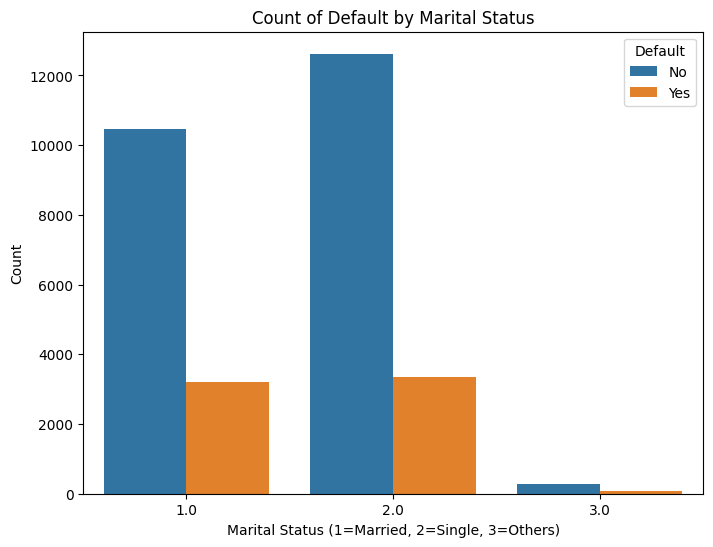

In [25]:
# Count plot for target variable by 'marital_status' 
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='marital_status', hue='default')
plt.title("Count of Default by Marital Status")
plt.xlabel("Marital Status (1=Married, 2=Single, 3=Others)")
plt.ylabel("Count")
plt.legend(title="Default", labels=["No", "Yes"])
plt.show()

### Observations 

- **Single clients (2)** have the highest count of both defaults and non-defaults, followed by **married clients (1)**.  
- The proportion of defaults is slightly higher among single clients compared to married ones, suggesting marital status might influence repayment behavior.  
- Clients in the **others (3)** category represent a very small portion of the dataset, with negligible impact on overall trends.


# Outlier Detection and Treatment

In [26]:
# Detecting outliers using the IQR method for numeric columns
numeric_cols = ['credit_amount', 'age'] + bill_cols + paid_cols

In [27]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Number of outliers in {col}: {len(outliers)}")

Number of outliers in credit_amount: 167
Number of outliers in age: 272
Number of outliers in bill_statement_sept: 2400
Number of outliers in bill_statement_aug: 2395
Number of outliers in bill_statement_jul: 2469
Number of outliers in bill_statement_jun: 2622
Number of outliers in bill_statement_may: 2725
Number of outliers in bill_statement_apr: 2693
Number of outliers in amount_paid_sept: 2745
Number of outliers in amount_paid_aug: 2714
Number of outliers in amount_paid_jul: 2598
Number of outliers in amount_paid_jun: 2994
Number of outliers in amount_paid_may: 2945
Number of outliers in amount_paid_apr: 2958


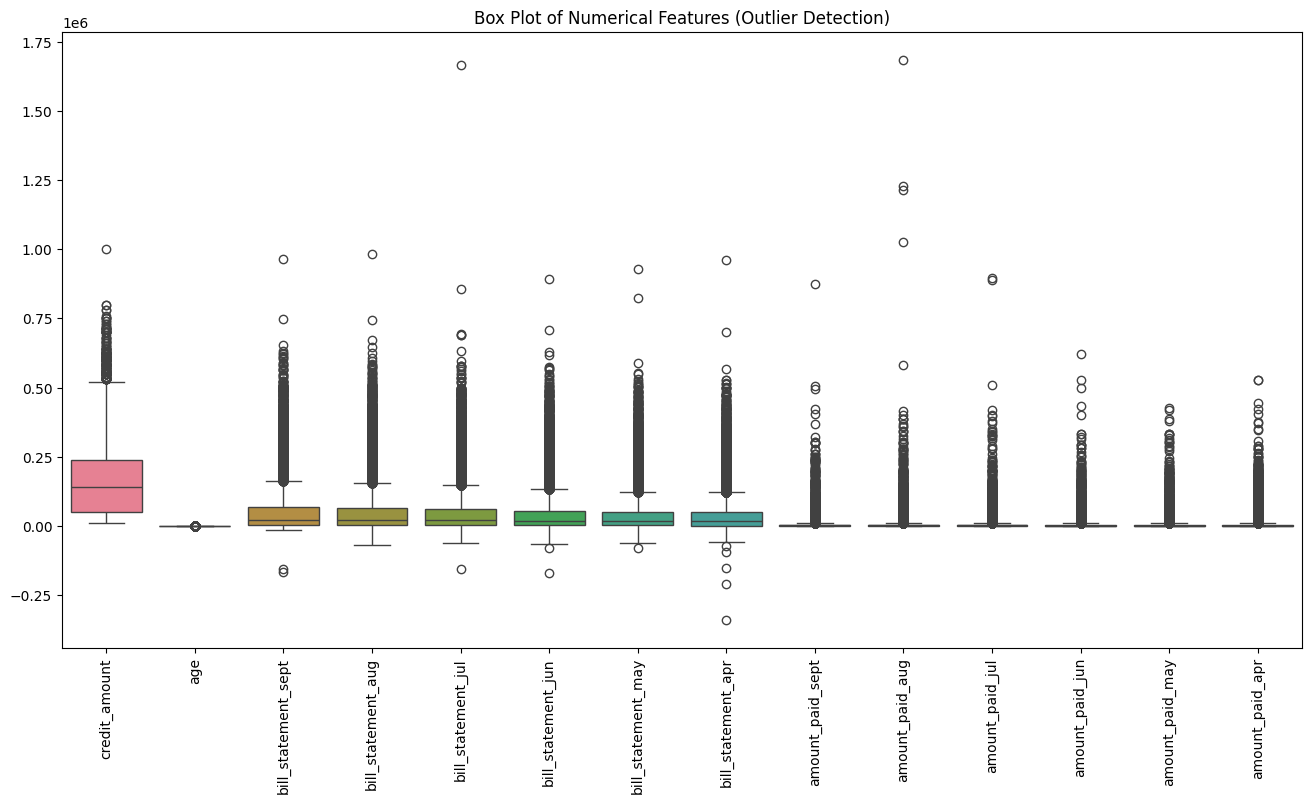

In [28]:
# Visualize outliers with box plots
plt.figure(figsize=(16, 8))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Box Plot of Numerical Features (Outlier Detection)")
plt.show()

- **Why We Are Not Treating Outliers**: In this analysis, outliers are not removed because they represent real variations in customer behavior, particularly for financial features such as credit amount, bill statements, and payments. Removing them could eliminate important insights about different customer segments, such as those with high income or unique financial activities. Therefore, outliers are retained to maintain the full range of customer data for deeper analysis.

# Bivariate Analysis

## Relationship Between Age and Credit Amount:

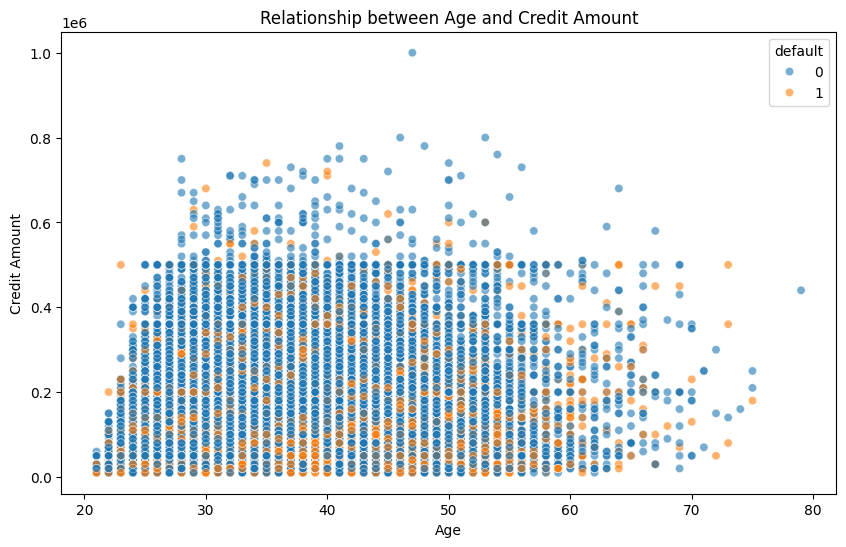

In [29]:
# Relationship between Age and Credit Amount
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='credit_amount', data=df, hue='default', alpha=0.6)
plt.title('Relationship between Age and Credit Amount')
plt.xlabel('Age')
plt.ylabel('Credit Amount')
plt.show()

#### Observations:
- There is no clear linear relationship between age and credit amount for both defaulting and non-defaulting customers.
- Default occurrences (orange points) are scattered across all age groups and credit amounts, indicating that neither factor alone strongly predicts default.


## Credit Amount by Education Level:

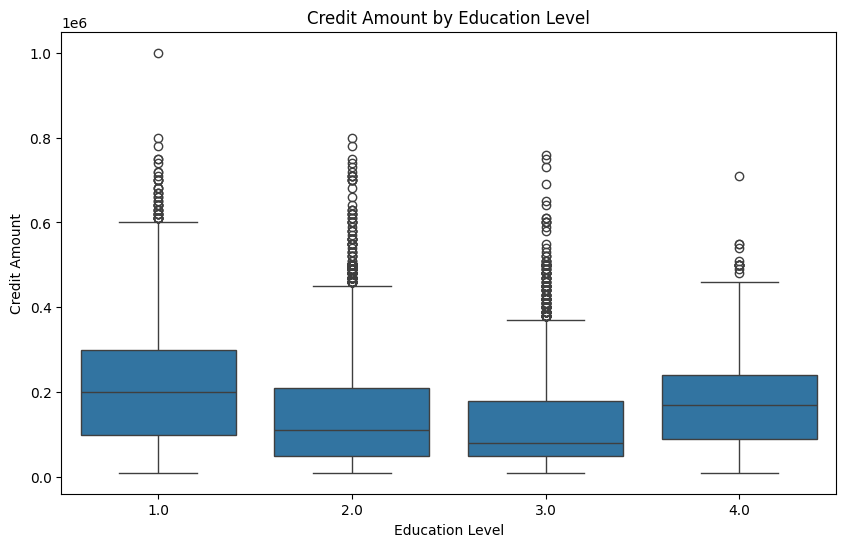

In [30]:
# Boxplot for Credit Amount by Education Level
plt.figure(figsize=(10,6))
sns.boxplot(x='education', y='credit_amount', data=df)
plt.title('Credit Amount by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Credit Amount')
plt.show()

#### Observation: Credit Amount by Education Level
- Higher education levels (e.g., 1) are associated with larger median credit amounts.
- Variability and outliers in credit amounts are consistent across all education levels.
- There is overlap between groups, but higher education generally correlates with larger credit limits.

## Average Repayment Status vs. Default

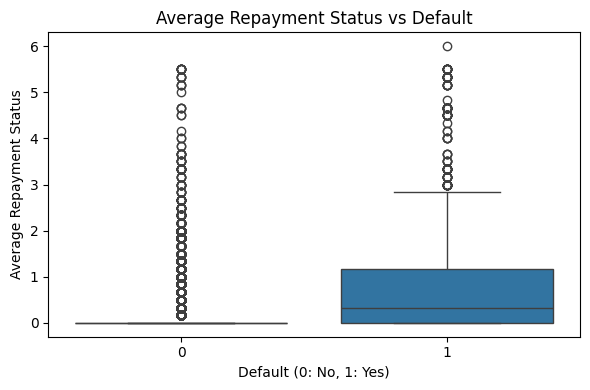

In [31]:
# Calculate average repayment status
df['avg_repayment_status'] = df[repayment_columns].mean(axis=1)

# Plot
plt.figure(figsize=(6, 4))
sns.boxplot(x='default', y='avg_repayment_status', data=df)
plt.title('Average Repayment Status vs Default')
plt.xlabel('Default (0: No, 1: Yes)')
plt.ylabel('Average Repayment Status')
plt.tight_layout()
plt.show()


### Observation for Average Repayment Status vs Default:

- Defaulted customers (1) exhibit higher average repayment statuses compared to non-defaulted customers (0).
- This indicates that defaulters are more likely to have delays in their payments across the months.

## Average Bill Statement Amount vs. Default

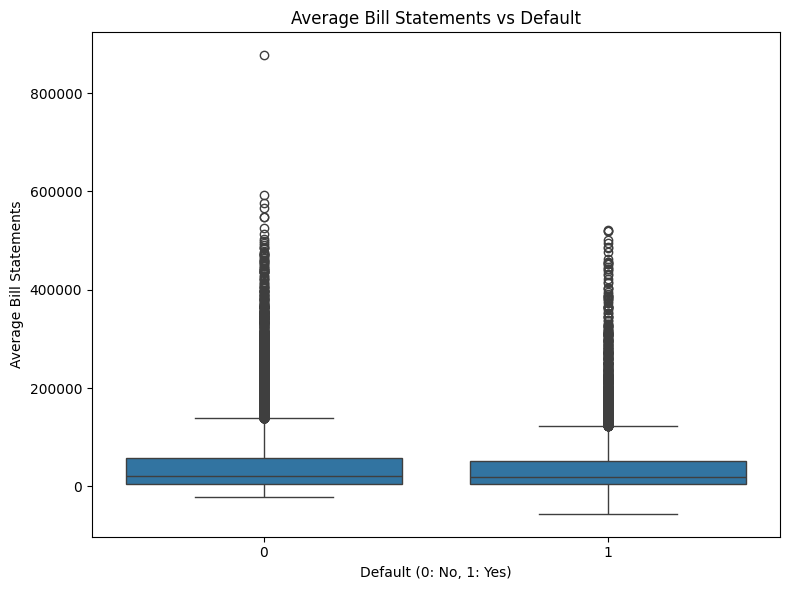

In [32]:
# Calculate average bill statements
df['avg_bill_statements'] = df[bill_cols].mean(axis=1)

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='default', y='avg_bill_statements', data=df)
plt.title('Average Bill Statements vs Default')
plt.xlabel('Default (0: No, 1: Yes)')
plt.ylabel('Average Bill Statements')
plt.tight_layout()
plt.show()


### Observation for Average Bill Statements vs Default:

- Defaulted customers tend to have slightly higher average bill statement amounts compared to non-defaulted customers.
- However, the variability (e.g., outliers) is high, indicating that while bill amounts are a factor, they may not solely determine default behavior.

## Average Amount Paid vs. Default

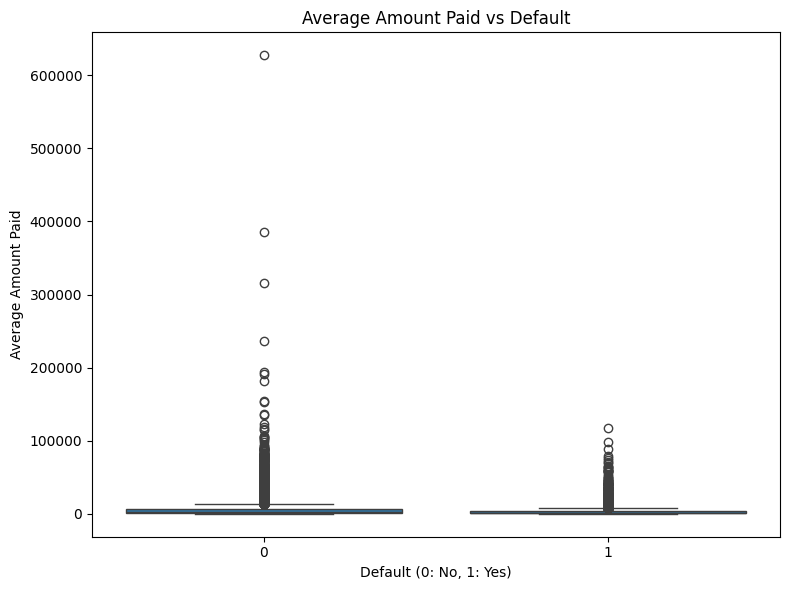

In [33]:
# Calculate average amount paid
df['avg_amount_paid'] = df[paid_cols].mean(axis=1)

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='default', y='avg_amount_paid', data=df)
plt.title('Average Amount Paid vs Default')
plt.xlabel('Default (0: No, 1: Yes)')
plt.ylabel('Average Amount Paid')
plt.tight_layout()
plt.show()


### Observation for Average Amount Paid vs Default:

- Non-defaulted customers (0) consistently make higher average payments compared to defaulted customers (1).
- Defaulted customers have lower payment amounts, suggesting a significant gap in repayment behavior between the two groups..

# Multivariate Analysis

## Correlation Analysis

### Repayment Status Variables

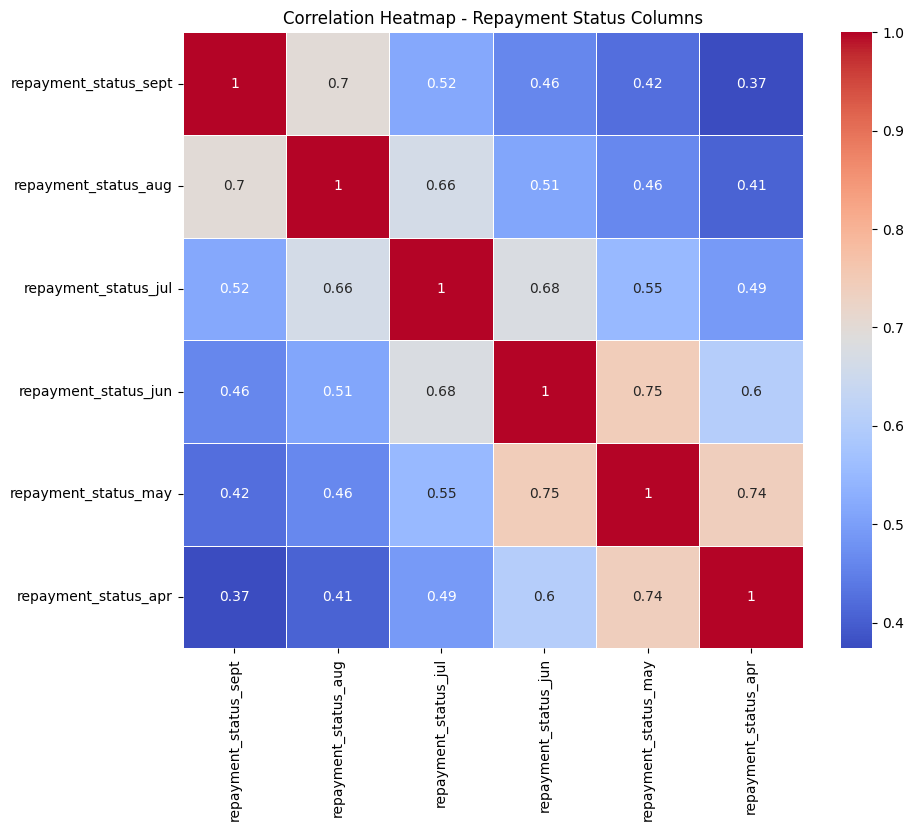

In [34]:
# Correlation Heatmap for Repayment Status Columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[repayment_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap - Repayment Status Columns')
plt.show()

### Observations 

- Repayment statuses are moderately to strongly correlated, especially between consecutive months (e.g., July and August: 0.77).  
- Correlations weaken over distant months (e.g., April and September: 0.47), indicating stronger temporal consistency in recent repayment behavior.


### Bill Statement Variables

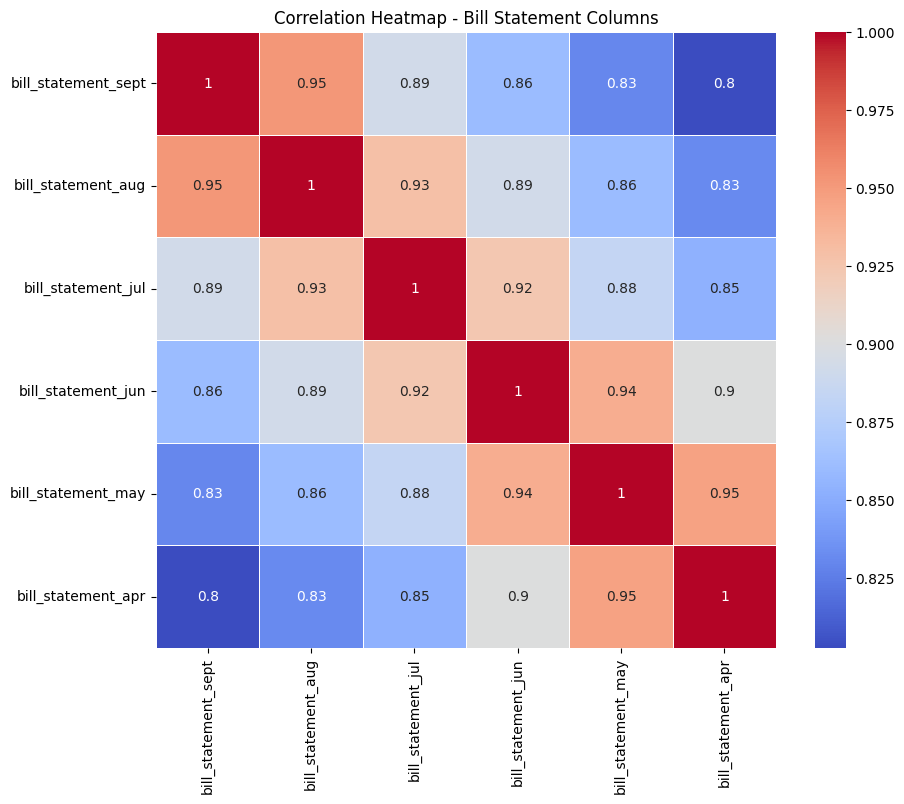

In [35]:
# Correlation Heatmap for Bill Statement Columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[bill_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap - Bill Statement Columns')
plt.show()


### Observations 

- Bill statement amounts are highly correlated across months, especially consecutive ones (e.g., September and August: 0.95).  
- The consistency in billing patterns indicates their strong predictive potential for defaults.


### Amount Paid Variables

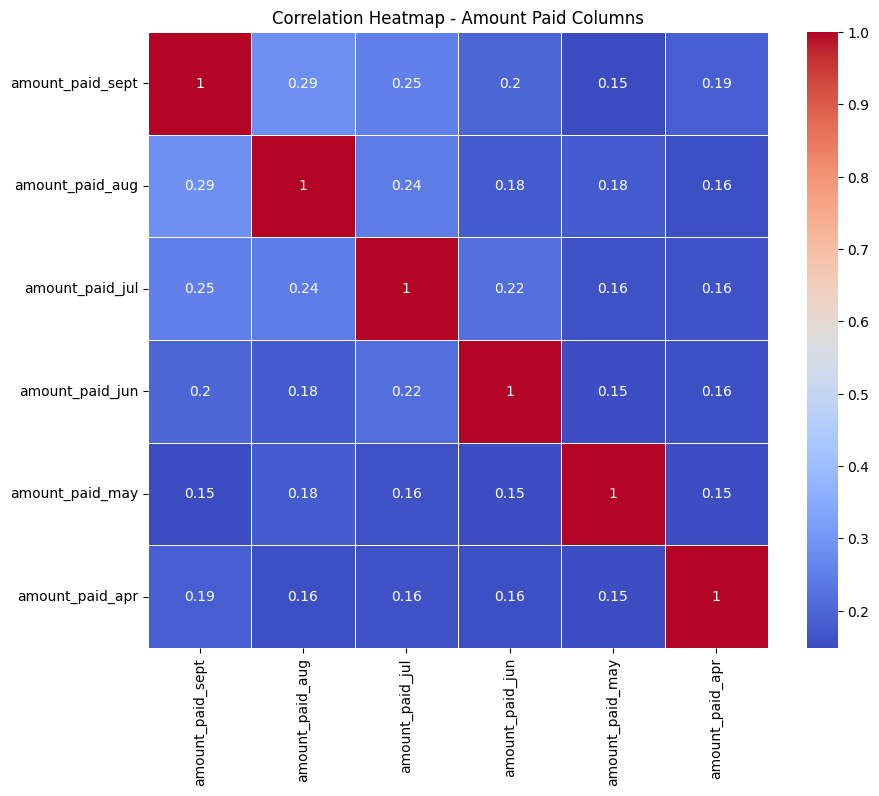

In [36]:
# Correlation Heatmap for Amount Paid Columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[paid_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap - Amount Paid Columns')
plt.show()

### Observations 

- Payment amounts show weak to moderate correlations, strongest between consecutive months (e.g., September and August: 0.29).  
- Correlations weaken over distant months, indicating inconsistent long-term payment behavior.


### Overall Correlation Matrix

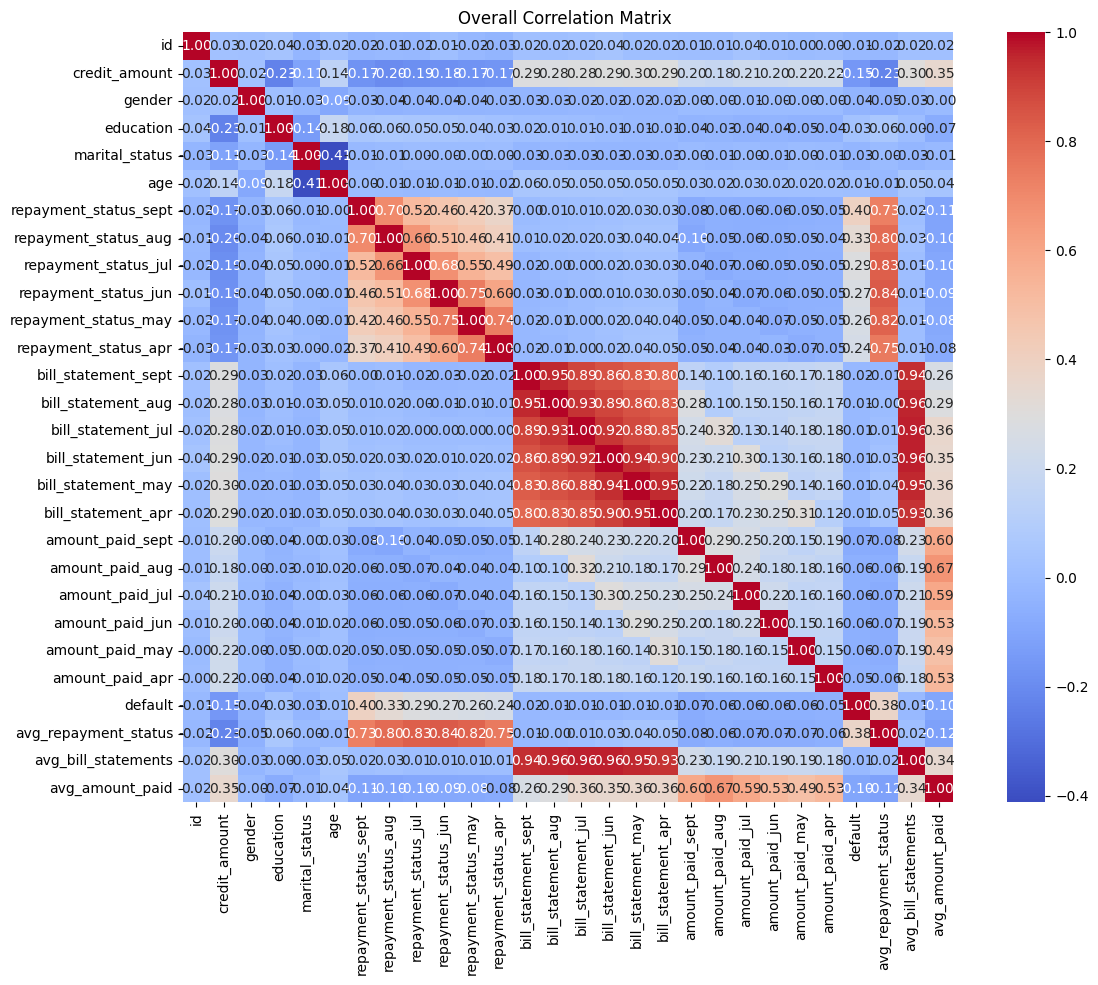

In [37]:
# Correlation matrix
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Overall Correlation Matrix ")
plt.show()


### Observations 

- **Repayment Status and Bill Statements**: Strong positive correlations are observed among repayment status variables across months and among bill statement variables, indicating consistency in behavior over time.
- **Bill Statements and Amount Paid**: Moderate correlations exist between bill statement amounts and payment amounts, suggesting that higher bill amounts are typically associated with higher payments.
- **Credit Amount**: Shows weak correlations with most variables, including the target variable **default**, indicating it may have limited predictive power.
- **Default and Repayment Status**: Repayment status variables exhibit a weak positive correlation with the target variable **default**, suggesting that repayment delays contribute to default risk.
- **Default and Amount Paid**: Negative correlations between payment amounts and **default** indicate that lower payments are associated with a higher likelihood of default.
- **Key Insight**: Repayment status and payment behavior are more strongly associated with default risk compared to credit amount, marital status, or education.


## Pair Plots

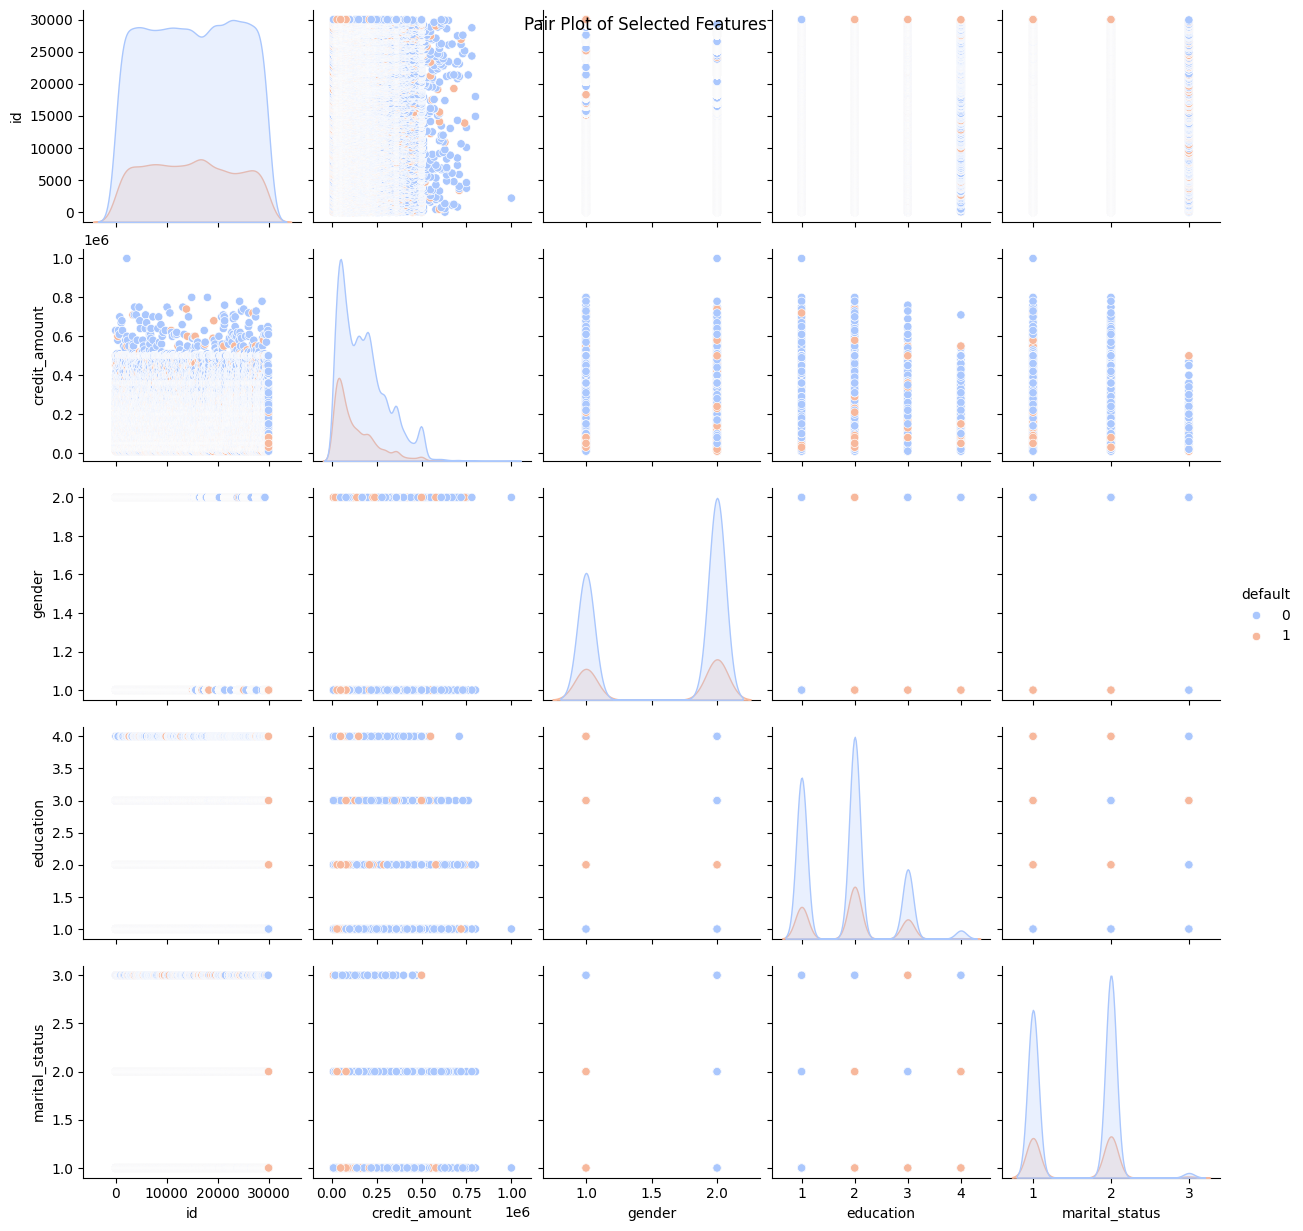

In [38]:
# Pair plot of selected features
sel_features = ['id', 'credit_amount', 'gender', 'education', 'marital_status'] 
selected_features = sel_features  # Select a few key features for pair plot
sns.pairplot(df, vars=selected_features, hue="default", palette="coolwarm")
plt.suptitle("Pair Plot of Selected Features")
plt.show()


### Observations from Pair Plot of Selected Features

- **Credit Amount**: Clients with higher credit limits tend to have a higher concentration of non-defaults (label `0`), suggesting that larger credit limits are often associated with responsible repayment behavior.
- **Gender**: There is no significant visible difference between defaulting and non-defaulting clients based on gender distribution.
- **Education**: Defaulting clients are spread across all education levels, but a higher concentration is observed among those with lower education levels.
- **Marital Status**: Married individuals (category `1`) exhibit fewer defaults compared to singles (`2`) and others (`3`), indicating marital status may influence repayment behavior.
- **Key Insight**: Education level and marital status show patterns that could serve as meaningful predictors of default risk, while gender has minimal impact.


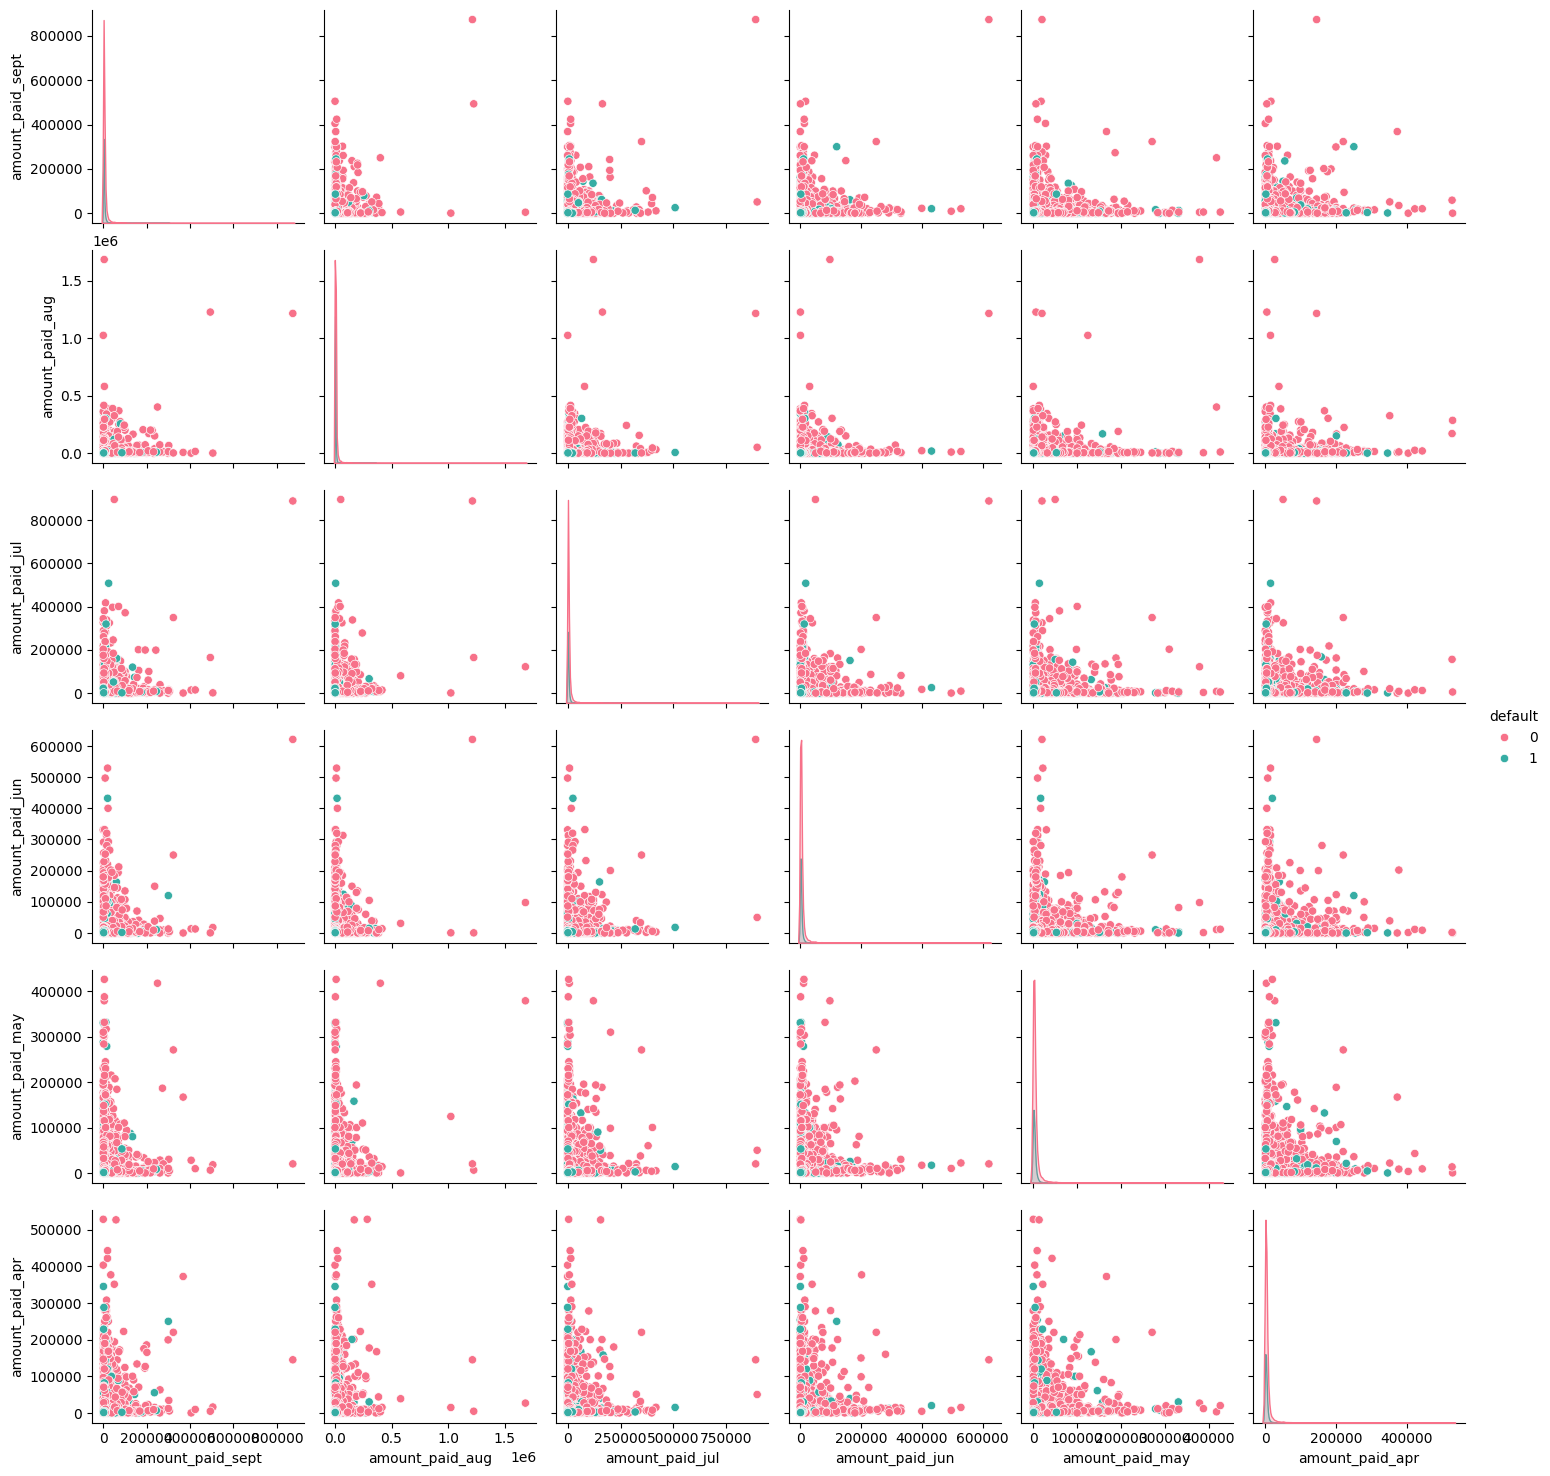

In [39]:
# Pairplot for Amount Paid in Different Months
sns.pairplot(df[paid_cols + ['default']], hue='default', palette='husl')
plt.show()


### Observations from Pair Plot of Amount Paid (April to September)

- **Distribution Patterns**: The distributions for all payment months are highly skewed, with a majority of payments concentrated in the lower range. A few extreme values are observed as outliers.
- **Relationship Between Months**: The scatterplots show weak correlations between payment amounts across different months, indicating inconsistent payment behaviors.
- **Default vs Non-Default**: Defaulting clients (label `1`) are more concentrated in the lower payment ranges, whereas non-defaulting clients (label `0`) show higher payments.
- **Key Insight**: Lower payment amounts across multiple months appear to be a strong indicator of default, highlighting payment consistency as a critical factor in predicting defaults.


# Time Series Analysis

## Bill Statement Trends

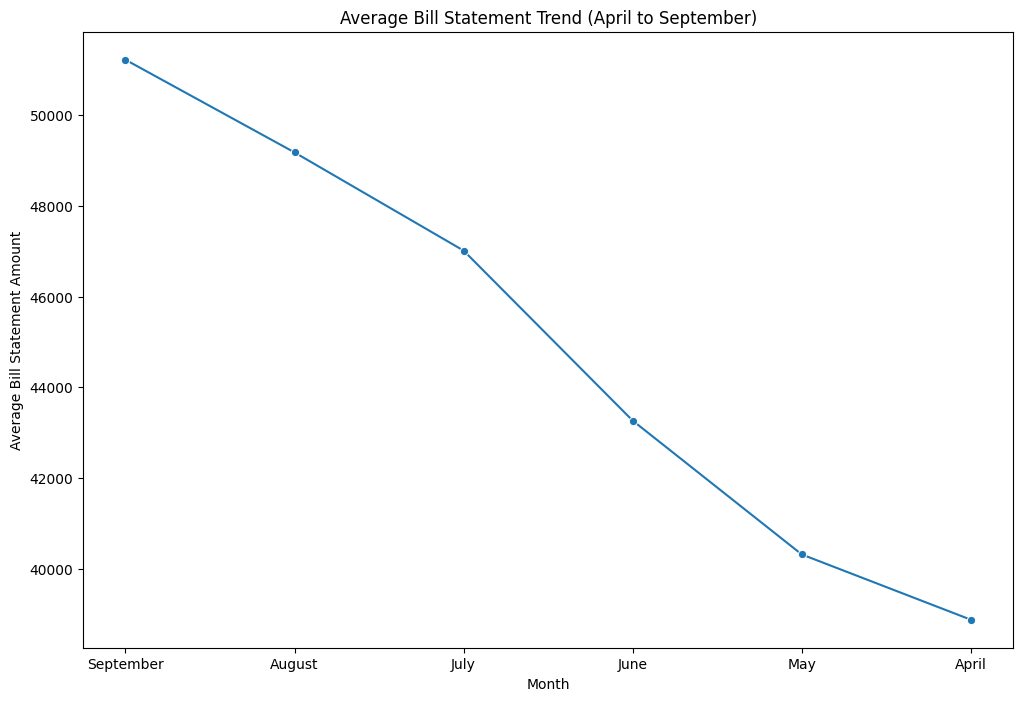

In [40]:
# Time Series Analysis of Bill Statements
bill_df = df[bill_cols]
bill_df.columns = ['September', 'August', 'July', 'June', 'May', 'April']
plt.figure(figsize=(12, 8))
sns.lineplot(data=bill_df.mean(), marker='o')
plt.title('Average Bill Statement Trend (April to September)')
plt.xlabel('Month')
plt.ylabel('Average Bill Statement Amount')
plt.show()


### Observations 

- The average bill statement amount is lowest in april and increases consistently over the months, reaching its highest in September.  
- This trend suggests a gradual reduction in outstanding balances, possibly due to increased payments or reduced credit usage over time.


## Amount Paid Trends

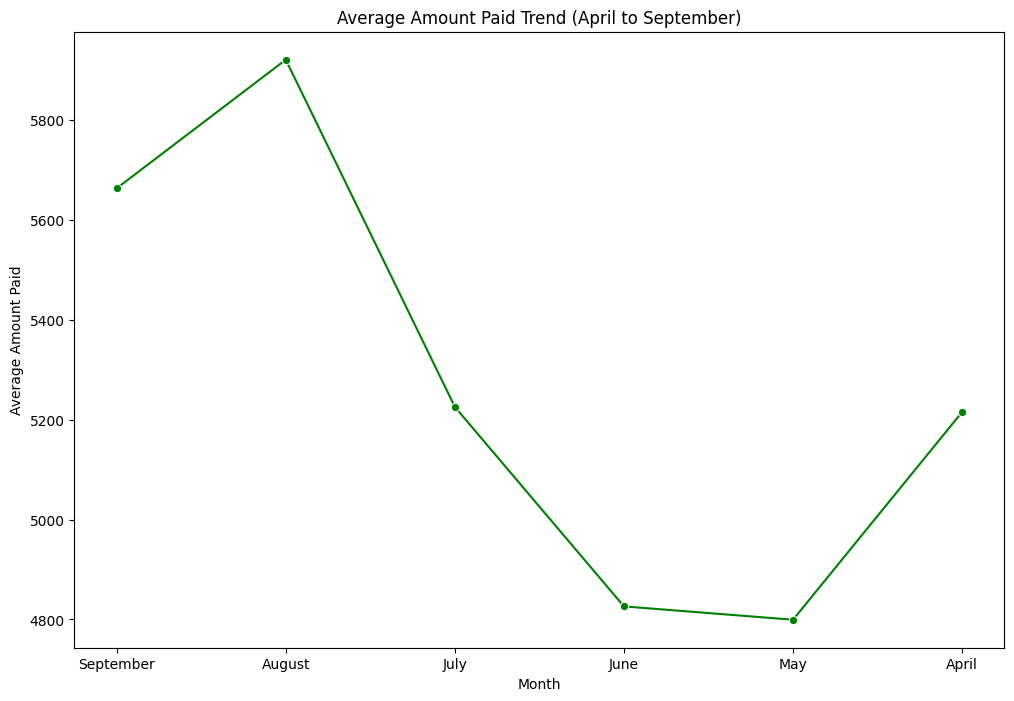

In [41]:
# Time Series Analysis of Amount Paid
paid_df = df[paid_cols]
paid_df.columns = ['September', 'August', 'July', 'June', 'May', 'April']
plt.figure(figsize=(12, 8))
sns.lineplot(data=paid_df.mean(), marker='o', color='green')
plt.title('Average Amount Paid Trend (April to September)')
plt.xlabel('Month')
plt.ylabel('Average Amount Paid')
plt.show()

### Observations 

- The average amount paid is lowest in May, increases steadily to its peak in August, and then begins to decline sharply.  
- The trend suggests higher payments during mid-year months, possibly due to seasonal factors or financial cycles.


## Repayment Status Trends

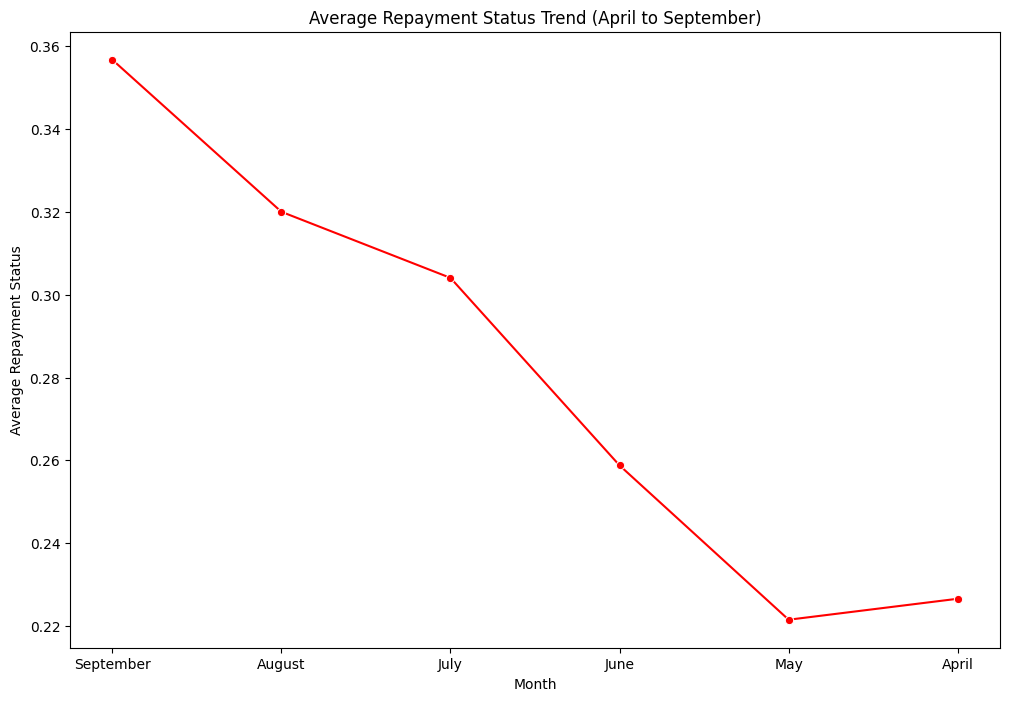

In [42]:
# Time Series Analysis of Repayment Status
repayment_df = df[repayment_columns]
repayment_df.columns = ['September', 'August', 'July', 'June', 'May', 'April']
plt.figure(figsize=(12, 8))
sns.lineplot(data=repayment_df.mean(), marker='o', color='red')
plt.title('Average Repayment Status Trend (April to September)')
plt.xlabel('Month')
plt.ylabel('Average Repayment Status')
plt.show()

### Observations 

- The average repayment status improves consistently from April to September, indicating better compliance over time.  
- A sharp improvement between September and August suggests seasonal or policy-driven influences on repayment behavior.


## Repayment Trends by Gender

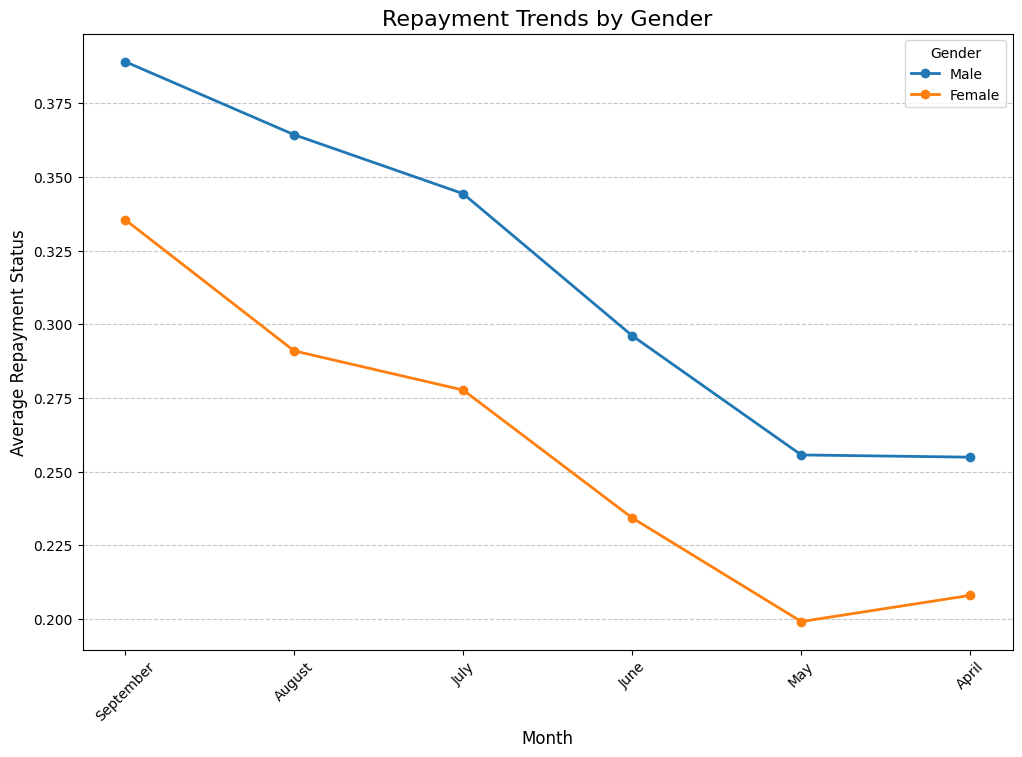

In [43]:
# Calculate the mean repayment status per gender for each month
repayment_by_gender = df.groupby('gender')[
    ['repayment_status_sept', 'repayment_status_aug', 'repayment_status_jul',
     'repayment_status_jun', 'repayment_status_may', 'repayment_status_apr']
].mean()

# Rename the indices to reflect gender categories
gender_mapping = {
    1: 'Male',
    2: 'Female'
}
repayment_by_gender.rename(index=gender_mapping, inplace=True)

# Plot repayment trends by gender
repayment_by_gender.T.plot(figsize=(12, 8), marker='o', linewidth=2)
plt.title('Repayment Trends by Gender', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Repayment Status', fontsize=12)
plt.xticks(
    ticks=range(len(repayment_columns)), 
    labels=['September', 'August', 'July', 'June', 'May', 'April'], 
    rotation=45
)
plt.legend(title='Gender', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Observations:
- Both genders show similar repayment trends over time.
- **Males** exhibit slightly higher repayment delays compared to **females**, who show better repayment discipline.




# Splitting the Dataset for Training and Testing

We split the data into training and testing sets. The target variable is `default`, while the rest of the features are used as predictors.


In [44]:
# Model Building and Evaluation

## Importing Necessary Libraries

# Import essential libraries for model building and evaluation
import time
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [45]:
# Data Splitting
# Separate the target variable 'default' and the features (rest of the columns)
X = df.drop(columns=['default'])
y = df['default']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
# Scaling the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE is applied to address class imbalance in the dataset, where the **default** class (1) is underrepresented compared to the **non-default** class (0). By generating synthetic samples for the minority class, SMOTE helps balance the dataset, allowing the model to learn better from the underrepresented class.

#### Why Use SMOTE?
1. **Balance the Dataset**: SMOTE generates synthetic instances of the minority class, reducing bias towards the majority class.
2. **Improve Model Performance**: It enhances the model's ability to predict defaults by improving recall, precision, and F1-score for the minority class.

We apply SMOTE to the training data, then train and evaluate models on the balanced dataset to assess improvements in predictive accuracy.


In [47]:
# Apply SMOTE to balance the dataset (oversample the minority class)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [48]:
# Initialize a dictionary to store the time taken for each model
model_times = {}

## Logistic Regression

In [49]:
# Start time tracking for Logistic Regression
start_time = time.time()

In [50]:
## Logistic Regression

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000, random_state=42)

In [51]:
# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)

#### Model Evaluation

In [52]:
# Evaluate Logistic Regression
print("Logistic Regression Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Evaluation:
Accuracy Score: 0.7643333333333333
Confusion Matrix:
 [[3841  846]
 [ 568  745]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      4687
           1       0.47      0.57      0.51      1313

    accuracy                           0.76      6000
   macro avg       0.67      0.69      0.68      6000
weighted avg       0.78      0.76      0.77      6000



#### Confusion Matrix Plot

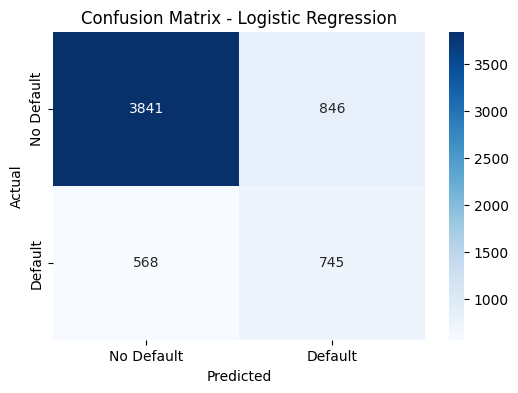

In [53]:
# Visualize the confusion matrix for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues', 
            xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [54]:
# End time tracking for Logistic Regression
end_time = time.time()
model_times['LR'] = end_time - start_time  # Store the time taken for Logistic Regression

## Decision Tree Classifier

In [55]:
# Start time tracking for Decision Tree Classifier
start_time = time.time()

In [56]:
## Decision Tree Classifier

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=42)

In [57]:
# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

#### Model Evaluation

In [58]:
# Evaluate Decision Tree
print("Decision Tree Classifier Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Classifier Evaluation:
Accuracy Score: 0.7286666666666667
Confusion Matrix:
 [[3819  868]
 [ 760  553]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      4687
           1       0.39      0.42      0.40      1313

    accuracy                           0.73      6000
   macro avg       0.61      0.62      0.61      6000
weighted avg       0.74      0.73      0.73      6000



#### Confusion Matrix Plot

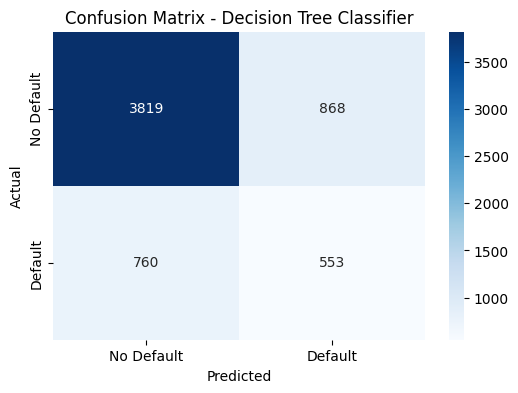

In [59]:
# Visualize the confusion matrix for Decision Tree
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues', 
            xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [60]:
# End time tracking for Decision Tree Classifier
end_time = time.time()
model_times['DT'] = end_time - start_time  # Store the time taken for Decision Tree Classifier

## Random Forest Classifier


In [61]:
# Start time tracking for KNN
start_time = time.time()

In [62]:
## Random Forest Classifier

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [63]:
# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

#### Model Evaluation

In [64]:
# Evaluate Random Forest
print("Random Forest Classifier Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier Evaluation:
Accuracy Score: 0.8126666666666666
Confusion Matrix:
 [[4352  335]
 [ 789  524]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      4687
           1       0.61      0.40      0.48      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.66      0.68      6000
weighted avg       0.79      0.81      0.80      6000



#### Confusion Matrix Plot

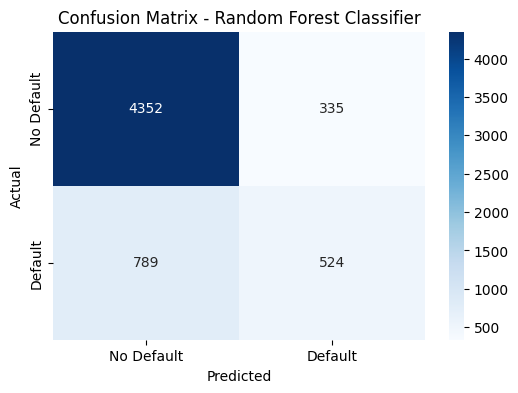

In [65]:
# Visualize the confusion matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', 
            xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [66]:
# End time tracking for KNN
end_time = time.time()
model_times['RF'] = end_time - start_time  # Store the time taken for KNN

In [67]:
print(model_times)

{'LR': 4.523113012313843, 'DT': 1.8283157348632812, 'RF': 20.576946020126343}


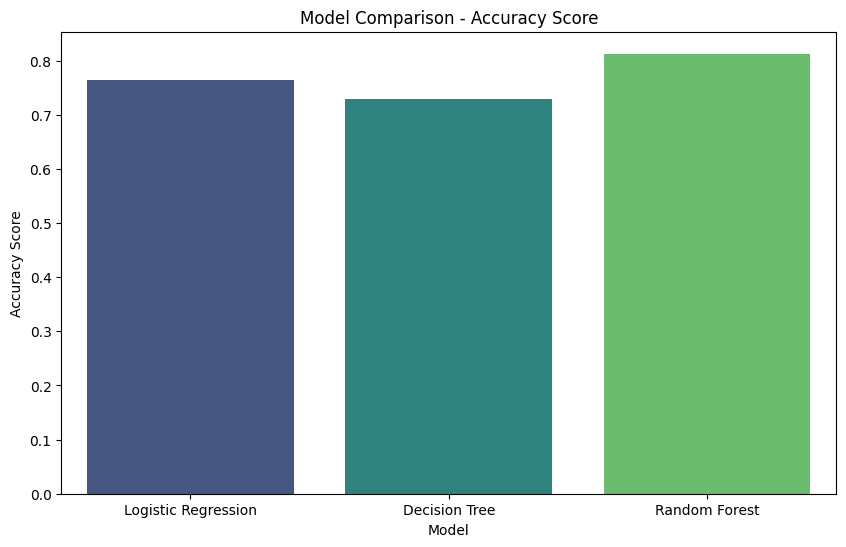

In [68]:
## Model Comparison

# Compare all models based on accuracy score
models = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log_reg),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf)
}

# Plot the accuracy scores for comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(models.keys()), y=list(models.values()), palette='viridis')
plt.title("Model Comparison - Accuracy Score")
plt.ylabel("Accuracy Score")
plt.xlabel("Model")
plt.show()


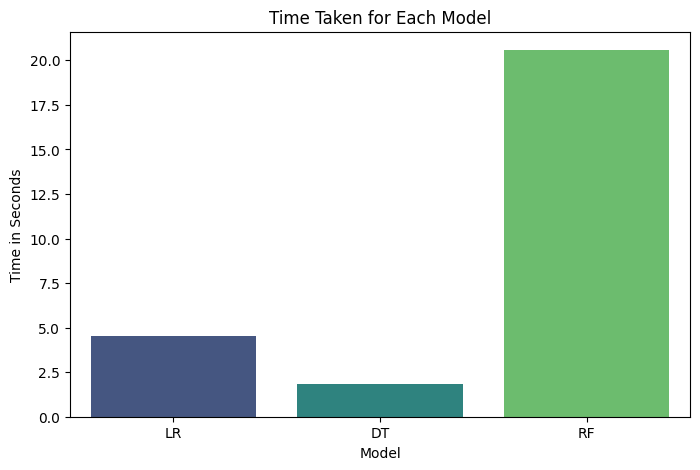

In [69]:
# Plotting time taken for each model
plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_times.keys()), y=list(model_times.values()), palette='viridis')
plt.title("Time Taken for Each Model")
plt.ylabel("Time in Seconds")
plt.xlabel("Model")
plt.show()